# COGS 118A- Project Checkpoint

# Names


- Jota Yamaguchi(A15581388)
- David Wang(A16035204)
- Wei Zhong (A15568452)
- Josie Li (A15924327)
- Mary Kovic (A15292606)


# Abstract 
Music has become significantly more accessible with the introduction of music applications such as Spotify and Soundcloud. We are no longer limited to listening to the radio or having to buy and use CDs. These applications not only allow us to listen to music wherever and whenever, but it also allows us to see measurements of certain audio features determined by the app. In this project, we will be predicting the genre of a song based on these features given by the Spotify music application. Our dataset from kaggle contains 6917 songs, each with 23 features (shape of 6917 x 23). Some of these features are simple characteristics such as artist or date of release. There are also more complicated features that spotify has found a way to measure such as ‘danceability’ or ‘liveliness’. Most importantly, the first column/feature contains the genre of each song. This is the feature that we will be predicting using the remaining features. Our success will be determined by the percentage of accuracy of our model and how well it can classify each song to its correct genre.

# Background

Spotify has an enormous library of music, with more than 70 million tracks as of 2021 <a name="ref_1"></a>[<sup>[1]</sup>](https://backlinko.com/spotify-users). With such an expansive array of songs for users to choose from, relevant recommendations are integral to enhancing user experience.

Given features of a song, spotify users can be recommended music that more accurately represents their tastes. Furthermore, recommendations can include lesser known artists to curate a more diversified musical palette. Researchers at Spotify have been working at perfecting a recommendation system for users. They found that users were more satisfied when recommended music included less popular tracks or those that strayed from their usual genre <a name="ref_2"></a>[<sup>[2]</sup>](https://research.atspotify.com/shifting-consumption-towards-diverse-content-via-reinforcement-learning/).

There has been some success in predicting genre based on the waveform of the song<a name="ref_3"></a>[<sup>[3]</sup>](https://towardsdatascience.com/predicting-music-genres-using-waveform-features-5080e788eb64), but we aim to predict genre based on the qualitative characteristics of a song. These characteristics include (but are not limited to) “Danceability”, “Acousticness”, and “Energy” <a name="ref_4"></a>[<sup>[4]</sup>](https://medium.com/@boplantinga/what-do-spotifys-audio-features-tell-us-about-this-year-s-eurovision-song-contest-66ad188e112a).

Songs in particular genres can be distinguished by a particular style. Songs in the same genre will bear similar characteristics, form, and/or style <a name="ref_5"></a>[<sup>[5]</sup>](https://towardsdatascience.com/predicting-music-genres-using-waveform-features-5080e788eb64). Therefore, we hypothesize that the characteristics of a song (as indicated above) will predict the genre that the song falls under. Determining the genres of songs based on qualitative categories is a more intuitive approach to classification.

# Problem Statement

In our project, we will try to predict the genres of songs based on the 23 features provided to us by the dataset. Given the fact that genres are discrete categories, we assume that a classification supervised-ML model will be our solution. The majority of features are represented as either a numerical value, a binomial distribution, or booleans. This allows us to represent our classification mathematically. Furthermore, we will use percentage of accuracy to measure our model success. If our model is successful, it should be replicable with any song on spotify given the 23 features. 


# Data

Dataset #1
- Name : Spotify Genre Audio Features 
- Link : https://www.kaggle.com/datasets/naoh1092/spotify-genre-audio-features
- Size : 23 Variables and 6917 Observations
- Description : Dataset collected form using Spotify’s public API and “The sound of Spotify” playlists, the dataset contains some critical variables that we will be utilizing in my classification model such as instrumentalness, acousticness, tempo, etc. These variables are represented numerically from 0 to 1. We will utilized these values to measure and train a classification model that will correctly predict a song’s genre given these values. 
- Cleaning : Need to delete columns with variables that we will not use in our classification model such as song id, cover link, title, etc. All variables values we will utilize is already in the format of floats and if there is straggling data, it will need to be cleaned along with tidying the dataset. 


In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

First, let's take a look at the data. By printing out the header, we can see that there are a lot of variables to work with. We are primiarily interested in the characteristics of a song, though. So, we will clean up the dataframe by removing some columns that are irrelevant to our problem.

In [2]:
df = pd.read_csv('spotify_genre_final.csv', encoding="ISO-8859-1")
df.head()

,Genre,Title,Album_cover_link,Artist,duration_ms,explicit,id,popularity,release_date,release_date_precision,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,rock,Baba O'Riley,https://i.scdn.co/image/ab67616d0000b273fe24dc...,The Who,300400,False,3qiyyUfYe7CRYLucrPmulD,75,1971-08-14,day,...,5,-8.367,1,0.0352,0.31300,0.185000,0.2870,0.150,117.292,4
1,rock,More Than a Feeling,https://i.scdn.co/image/ab67616d0000b27390ef97...,Boston,285133,False,1QEEqeFIZktqIpPI4jSVSF,78,1976,year,...,7,-8.039,1,0.0298,0.00088,0.002300,0.0504,0.285,108.789,4
2,rock,(Don't Fear) The Reaper,https://i.scdn.co/image/ab67616d0000b2733ac318...,Blue yster Cult,308120,False,5QTxFnGygVM4jFQiBovmRo,76,1976,year,...,9,-8.550,0,0.0733,0.00290,0.000208,0.2970,0.385,141.466,4
3,rock,Jump - 2015 Remaster,https://i.scdn.co/image/ab67616d0000b273b414c6...,Van Halen,241599,False,7N3PAbqfTjSEU1edb2tY8j,78,1984-01-04,day,...,0,-6.219,1,0.0317,0.17100,0.000377,0.0702,0.795,129.981,4
4,rock,Stairway to Heaven - Remaster,https://i.scdn.co/image/ab67616d0000b273c8a11e...,Led Zeppelin,482830,False,5CQ30WqJwcep0pYcV4AMNc,79,1971-11-08,day,...,9,-12.049,0,0.0339,0.58000,0.003200,0.1160,0.197,82.433,4


In [3]:
df.shape

(6917, 23)

In [4]:
#let's get rid of unnecessary columns.
df = df.drop(['Title', 'Album_cover_link', 'duration_ms', 'explicit', 'id', 'release_date_precision', 'total_tracks', 'time_signature'], axis=1)
df

,Genre,Artist,popularity,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,rock,The Who,75,1971-08-14,0.489,0.724,5,-8.367,1,0.0352,0.31300,0.185000,0.2870,0.150,117.292
1,rock,Boston,78,1976,0.377,0.681,7,-8.039,1,0.0298,0.00088,0.002300,0.0504,0.285,108.789
2,rock,Blue yster Cult,76,1976,0.333,0.927,9,-8.550,0,0.0733,0.00290,0.000208,0.2970,0.385,141.466
3,rock,Van Halen,78,1984-01-04,0.572,0.835,0,-6.219,1,0.0317,0.17100,0.000377,0.0702,0.795,129.981
4,rock,Led Zeppelin,79,1971-11-08,0.338,0.340,9,-12.049,0,0.0339,0.58000,0.003200,0.1160,0.197,82.433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6912,r&b,Victoria Mon??t,62,2020-08-07,0.571,0.431,1,-8.889,1,0.0547,0.63700,0.005240,0.1220,0.361,130.111
6913,r&b,Ruff Endz,1,2000-07-22,0.627,0.405,10,-7.189,1,0.0335,0.36800,0.000000,0.0972,0.298,111.832
6914,r&b,Elle Varner,34,2012-08-03,0.507,0.832,9,-4.746,1,0.2110,0.09010,0.000000,0.1640,0.578,84.917
6915,r&b,Leela James,46,2021-07-30,0.850,0.700,8,-5.287,1,0.1310,0.06290,0.000002,0.0616,0.740,139.980


Now, we can check for any null values in the dataframe. As we can see, there were no null values since the shape is the same.

In [5]:
df.isnull().values.any()

False

In [6]:
df.shape

(6917, 15)

Here, we see the variables that we will work with in this project.

In [7]:
for col in df.columns:
    print(col)

Genre
Artist
popularity
release_date
danceability
energy
key
loudness
mode
speechiness
acousticness
instrumentalness
liveness
valence
tempo


These are the unique genres in the dataset and below is a plot showing the prevalence of each genre. As we can see, there are more rock and pop songs than rap or r&b. This could be indicative of the saturation and popularity of rock and pop songs. We will keep this in mind while looking further at the data.

In [8]:
df['Genre'].unique()

array(['rock', 'rap', 'edm', 'latin', 'pop', 'hiphop', 'r&b'],
      dtype=object)

<AxesSubplot:xlabel='Genre', ylabel='count'>

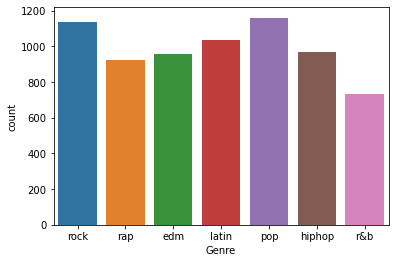

In [9]:
sns.countplot(x='Genre', data=df)

Below are several plots which show the characteristic level of each genre for each characteristic. These characteristics include: danceability, energy, key, loudness, speechiness, acousticness, instrumentalness, liveness, and valence. We also included measures of tempo and popularity for each genre.

The purpose of these plots is to see if genres can be identified by the levels of particular charactertistics. We hypothesize that by analyzing several characteristic levels, we can identify the genre of the song.

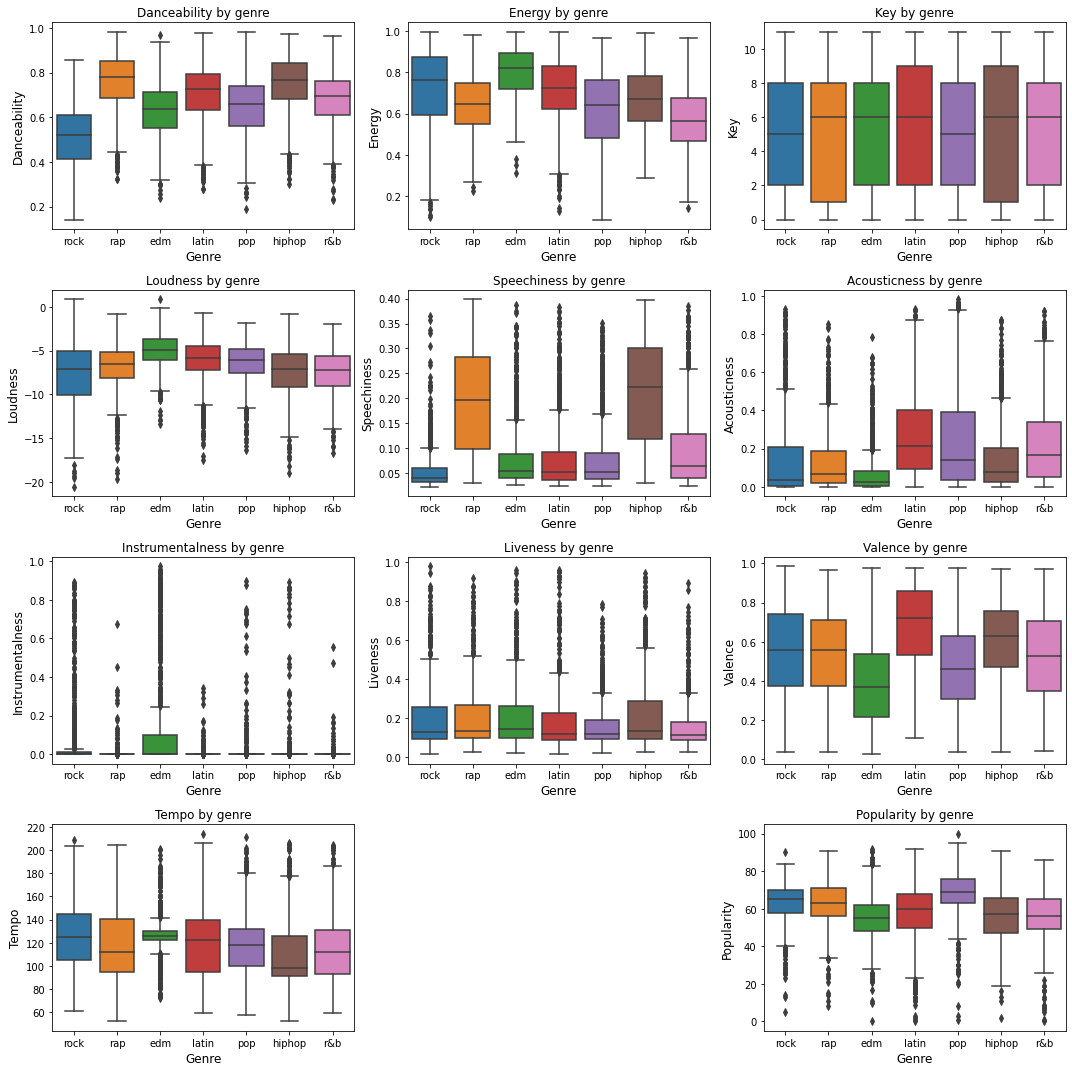

In [10]:
import matplotlib.pyplot as plt
#fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(4, 3)

plt.rcParams['savefig.facecolor'] = "0.8"

def characteristics_plot(ax, characteristic):
    characteristic = characteristic.capitalize()
    ax.set_xlabel('Genre', fontsize=12)
    ax.set_ylabel(characteristic, fontsize=12)
    ax.set_title(characteristic + " by genre", fontsize=12)
    return 
            
plt.close('all')
fig = plt.figure()

fig.set_figheight(15)
fig.set_figwidth(15)

ax1 = plt.subplot2grid((4, 3), (0, 0))
ax1 = sns.boxplot(x='Genre', y='danceability', data=df)
ax2 = plt.subplot2grid((4, 3), (0, 1))
ax2 = sns.boxplot(x='Genre', y='energy', data=df)
ax3 = plt.subplot2grid((4, 3), (0, 2))
ax3 = sns.boxplot(x='Genre', y='key', data=df)
ax4 = plt.subplot2grid((4, 3), (1, 0))
ax4 = sns.boxplot(x='Genre', y='loudness', data=df)
ax5 = plt.subplot2grid((4, 3), (1, 1))
ax5 = sns.boxplot(x='Genre', y='speechiness', data=df)
ax6 = plt.subplot2grid((4, 3), (1, 2))
ax6 = sns.boxplot(x='Genre', y='acousticness', data=df)
ax7 = plt.subplot2grid((4, 3), (2, 0))
ax7 = sns.boxplot(x='Genre', y='instrumentalness', data=df)
ax8 = plt.subplot2grid((4, 3), (2, 1))
ax8 = sns.boxplot(x='Genre', y='liveness', data=df)
ax9 = plt.subplot2grid((4, 3), (2, 2))
ax9 = sns.boxplot(x='Genre', y='valence', data=df)
ax10 = plt.subplot2grid((4, 3), (3, 0))
ax10 = sns.boxplot(x='Genre', y='tempo', data=df)
ax11 = plt.subplot2grid((4, 3), (3, 2))
ax11 = sns.boxplot(x='Genre', y='popularity', data=df)

characteristics_plot(ax1, 'danceability')
characteristics_plot(ax2, 'energy')
characteristics_plot(ax3, 'key')
characteristics_plot(ax4, 'loudness')
characteristics_plot(ax5, 'speechiness')
characteristics_plot(ax6, 'acousticness')
characteristics_plot(ax7, 'instrumentalness')
characteristics_plot(ax8, 'liveness')
characteristics_plot(ax9, 'valence')
characteristics_plot(ax10, 'tempo')
characteristics_plot(ax11, 'popularity')

plt.tight_layout()

We also were wondering if artistis stick with a singular genre. It was found that most artists stick with a single genre, but several brach out. The input test album gives artist name so it could help in classifying the album.

<AxesSubplot:>

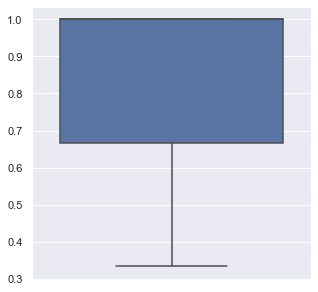

In [11]:
#Do most artists stick with a single genre?

count=df['Artist'].value_counts()
#get all albums made by an artist that has made more than 2 albums
df_artist=df[df['Artist'].isin(count.index[count.gt(2)])]
df_artist= df_artist.sort_values(by=['Artist']).reset_index()
df_artist_list=sorted(df_artist['Artist'].unique())
var_artist=[]
#for each artist, take the number of albums for the genre they made most albums of and divide by total amount of albums
for element in df_artist_list:
    tempdf=df_artist[df_artist['Artist'] == element]
    tempcount=tempdf['Genre'].value_counts()
    var_artist.append(tempcount[0]/sum(tempcount))
    #templist=tempdf['Genre'].value_counts().index.tolist()
    #print(templist) 

sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot(y=var_artist)

Furthermore, we checked if genres were more popular during certain years. This would be useful if we wanted to use the year that a song was released to identify a genre.

In [12]:
#how about time? Were some genres more popular in certain time frames?
#year cleanup
temp=df['release_date']
year1=pd.to_datetime(temp)
for i in range (year1.size):
    year1[i] =year1[i].year
df=df.assign(release_date=year1)
#df['release_date'].value_counts().sort_index(ascending=False)

Text(0.5, 1.0, '2000-2021 genre count. Number of albums:5204')

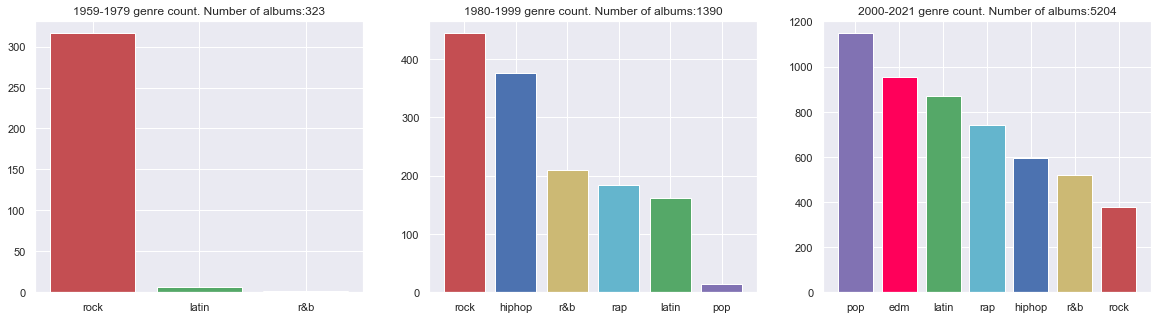

In [13]:
df['release_date'].value_counts().sort_index(ascending=False)
df1=df[df['release_date'] < 1980]
df2=df[df['release_date'] >= 1980]
df2=df2[df2['release_date'] < 2000]
df3=df[df['release_date'] >= 2000]

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].bar(df1['Genre'].value_counts().index.tolist(),df1['Genre'].value_counts(),color = ['r','g','y'])
axes[0].set_title("1959-1979 genre count. Number of albums:"+ str(df1['Genre'].value_counts().sum()))
axes[1].bar(df2['Genre'].value_counts().index.tolist(),df2['Genre'].value_counts(),color = ['r','b','y','c','g','m'])
axes[1].set_title("1980-1999 genre count. Number of albums:" +str(df2['Genre'].value_counts().sum()))
axes[2].bar(df3['Genre'].value_counts().index.tolist(),df3['Genre'].value_counts(),color = ['m','#ff005a','g','c','b','y','r'])
axes[2].set_title("2000-2021 genre count. Number of albums:" + str(df3['Genre'].value_counts().sum()))


# Proposed Solution

A solution to the problem is that we will be using a supervised classification algorithm similar to training a neural network to correctly predict a song’s genre given it’s values from variables in the dataset that will help us classify a song’s genre with these aspects. Using randomly assigned data split into epochs, can do a 9:1 split to training/testing data. Through the training data, we will measure the similarities between a combination of variables values that a certain genre of music has between the observations. Through testing, the algorithm will attempt to correctly classify a song’s genre, given the variables values of the song (values of its acousticness, dancibility, tempo, instrumentalness, etc.). Lastly, we will percent accuracy of the training and testing data of our classification model to measure it’s success if it’s replication with any song on spotify. 

# Preliminary Results

feature selection source: https://medium.com/nerd-for-tech/data-engineering-a-feature-selection-example-with-the-iris-dataset-11f0554e4b00. Since there are several datapoints, and the computation cost of using all datapoints is high, we performed feature selection to narrow down the number of features required for the model. We selected 6 features by the select K best technique and assessed the features with confusion matrices as well as pairplots.

In [14]:
df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000
mean,60.491543,0.663048,0.680214,5.348851,-6.725942,0.584357,0.111231,0.178805,0.034783,0.184376,0.538109,120.034788
std,12.944708,0.151653,0.173824,3.617507,2.783829,0.492868,0.096413,0.214174,0.138639,0.147764,0.233274,28.015297
min,0.000000,0.142000,0.084800,0.000000,-20.567000,0.000000,0.022400,0.000002,0.000000,0.013600,0.026000,52.145000
25%,53.000000,0.562000,0.562000,2.000000,-8.166000,0.000000,0.040600,0.020400,0.000000,0.091600,0.356000,96.571000
50%,62.000000,0.679000,0.696000,6.000000,-6.258000,1.000000,0.064500,0.088000,0.000002,0.125000,0.546000,120.010000
75%,69.000000,0.775000,0.818000,8.000000,-4.787000,1.000000,0.157000,0.261000,0.000470,0.236000,0.728000,136.029000
max,100.000000,0.983000,0.998000,11.000000,0.878000,1.000000,0.399000,0.983000,0.973000,0.979000,0.985000,214.025000


In [15]:
df['Genre'].value_counts()

pop       1161
rock      1136
latin     1036
hiphop     971
edm        956
rap        926
r&b        731
Name: Genre, dtype: int64

In [16]:
#convert genre to numerical
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['GenreNum'] = LE.fit_transform(df['Genre'])
LE.classes_

array(['edm', 'hiphop', 'latin', 'pop', 'r&b', 'rap', 'rock'],
      dtype=object)

In [17]:
df.head()
df = df.drop(columns=['Genre','Artist'])

In [18]:
df.head()

,popularity,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,GenreNum
0,75,1971,0.489,0.724,5,-8.367,1,0.0352,0.31300,0.185000,0.2870,0.150,117.292,6
1,78,1976,0.377,0.681,7,-8.039,1,0.0298,0.00088,0.002300,0.0504,0.285,108.789,6
2,76,1976,0.333,0.927,9,-8.550,0,0.0733,0.00290,0.000208,0.2970,0.385,141.466,6
3,78,1984,0.572,0.835,0,-6.219,1,0.0317,0.17100,0.000377,0.0702,0.795,129.981,6
4,79,1971,0.338,0.340,9,-12.049,0,0.0339,0.58000,0.003200,0.1160,0.197,82.433,6


Below is a confusion matrix that shows the characteristics that have the greatest correlation with one another.

In [19]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
df_norm=scaler.transform(df)

# visualizing features and target
df_norm = pd.DataFrame(df_norm, columns = df.columns)

In [20]:
#sns.pairplot(df_norm, hue = 'GenreNum', diag_kind='hist')

<AxesSubplot:>

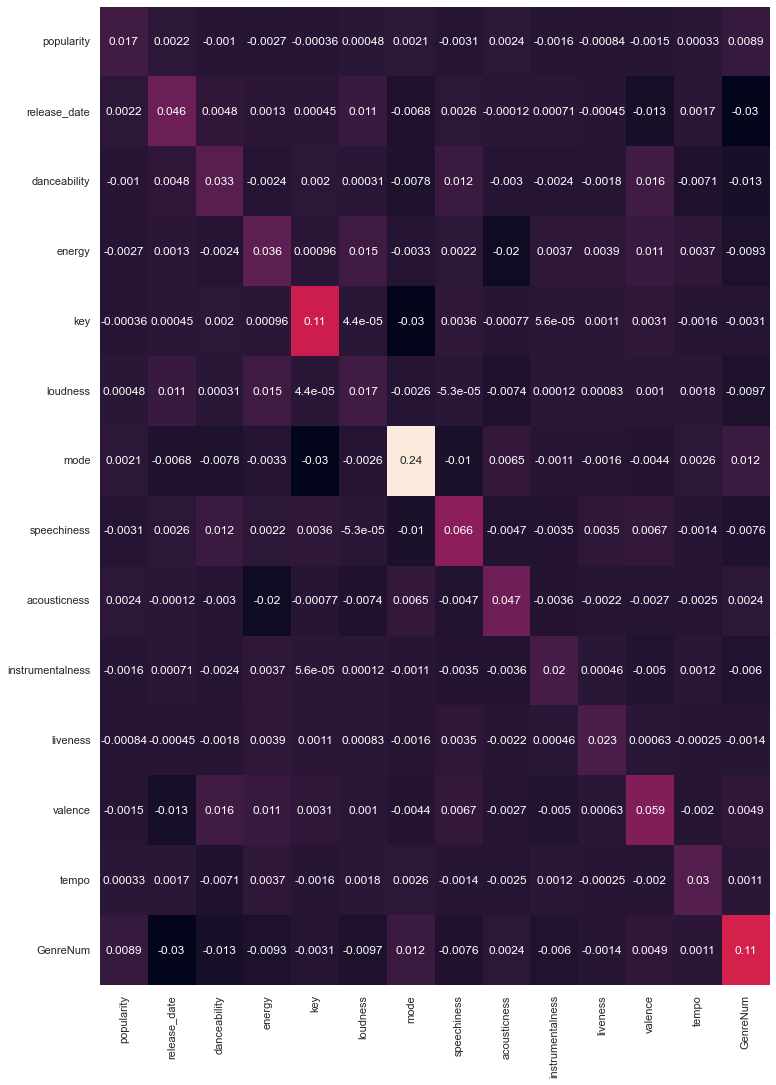

In [21]:
import matplotlib.pyplot as plt
df_cov = df_norm.cov()
plt.figure(figsize=(12, 18))
sns.heatmap(df_cov, annot = True, cbar = False)

In [22]:
target = df['GenreNum']
df_norm = df

from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=7)
selector.fit(df_norm, target)
cols = selector.get_support(indices=True)
df_trim = df_norm.iloc[:,cols]
print(selector.scores_)
print(selector.pvalues_)
print(df_trim.shape)

[180.98897792 842.78474147 443.20554679 200.64707366   2.50564097
 135.35891592  28.63826853 674.08380582 135.1803872  148.90041211
  16.57847999 181.61770577  45.12289853          inf]
[1.06488037e-214 0.00000000e+000 0.00000000e+000 1.35473115e-236
 2.00873684e-002 1.20936937e-162 5.01530354e-034 0.00000000e+000
 1.94844999e-162 2.82568074e-178 4.48624338e-019 2.09969473e-215
 1.85362325e-054 0.00000000e+000]
(6917, 7)


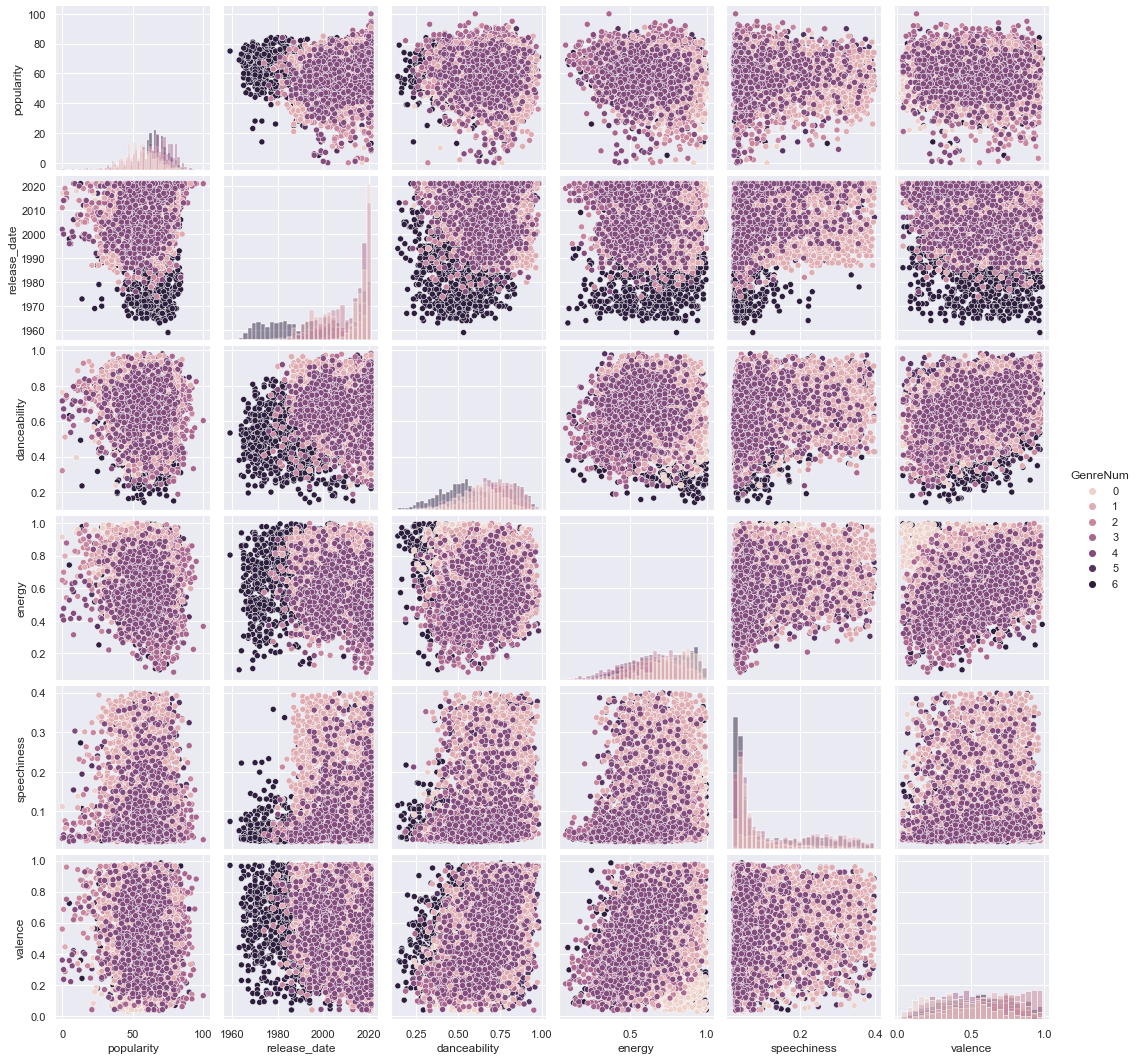

In [23]:
#plot pair plot again
sns.pairplot(df_trim, hue = 'GenreNum', diag_kind='hist')

Below is another confusion matrix, but now we compare the correlations between genres. We applied numerical values to each genre for processing.

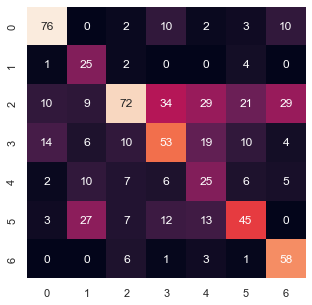

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
def train_and_validate(X_train, X_test, y_train, y_test):
    mode = GaussianNB()    
    mode.fit(X_train, y_train);
    y_calc = mode.predict(X_test)
    y_prob = mode.predict_proba(X_test)
    mat = confusion_matrix(y_test, y_calc)
    sns.heatmap(mat.T, annot=True, cbar = False)
df_norm = df.drop(columns = ['GenreNum'])
X_train, X_test, y_train, y_test = train_test_split(df_norm, target, test_size = 0.10, stratify = None, random_state=0)
train_and_validate(X_train, X_test, y_train, y_test)

In [25]:
newdf = df_trim
newdf.head()

,popularity,release_date,danceability,energy,speechiness,valence,GenreNum
0,75,1971,0.489,0.724,0.0352,0.150,6
1,78,1976,0.377,0.681,0.0298,0.285,6
2,76,1976,0.333,0.927,0.0733,0.385,6
3,78,1984,0.572,0.835,0.0317,0.795,6
4,79,1971,0.338,0.340,0.0339,0.197,6


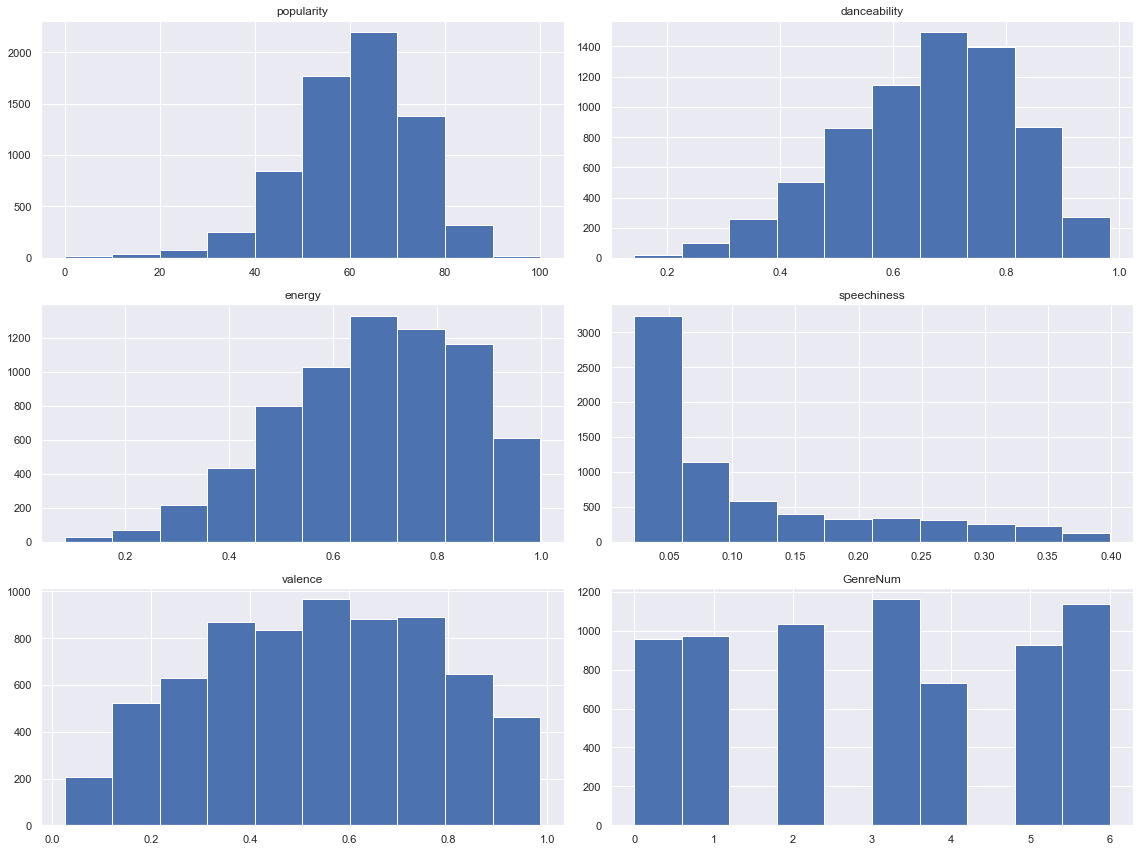

In [26]:
fig = plt.figure(figsize = (16,12))
ax = fig.gca()
newdf.hist(ax = ax);
plt.tight_layout();

Text(0.5, 1.0, 'GenreNum')

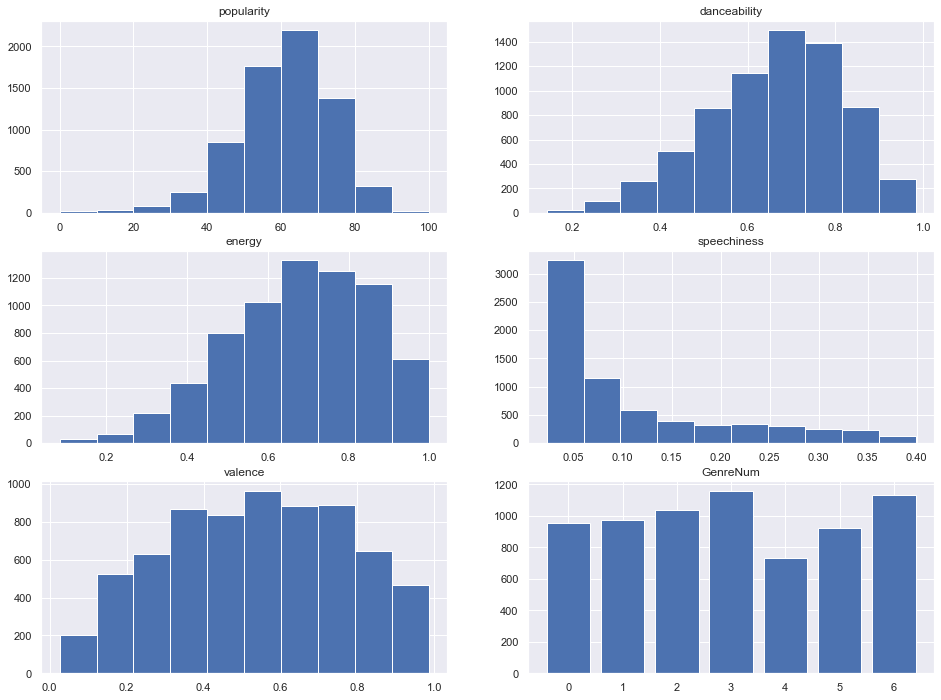

In [27]:
fig,axes = plt.subplots(3, 2, figsize=(16, 12))
axes[0,0].hist(newdf['popularity'])
axes[0,0].set_title("popularity")
axes[0,1].hist(newdf['danceability'])
axes[0,1].set_title("danceability")
axes[1,0].hist(newdf['energy'])
axes[1,0].set_title("energy")
axes[1,1].hist(newdf['speechiness'])
axes[1,1].set_title("speechiness")
axes[2,0].hist(newdf['valence'])
axes[2,0].set_title("valence")
axes[2,1].bar(newdf['GenreNum'].value_counts().index.tolist(),newdf['GenreNum'].value_counts())
axes[2,1].set_title("GenreNum")

# Evaluation Metrics

To quantify the performance of our models, the simplest solution is to use the provided genres of the albums in our dataset to score the performance on a percentile basis of how many of the albums the model classified correctly. A confusion matrix would also help visualize the accuracy of our model.
Another method would be to use K-fold cross validation, shuffling then splitting the dataset into k groups, then iteratively using each group as a testing set to evaluate the temporary model fitted from the data from the other k-1 groups by way of the mean of performance estimates.


First we will be creating a baseline model with all avaliable variables to see the baseline model performance, then we will create a new model with the selected features, and compare the results of the two baseline models.

In [28]:
data = df_norm
target = pd.DataFrame(newdf['GenreNum'])
data

,popularity,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,75,1971,0.489,0.724,5,-8.367,1,0.0352,0.31300,0.185000,0.2870,0.150,117.292
1,78,1976,0.377,0.681,7,-8.039,1,0.0298,0.00088,0.002300,0.0504,0.285,108.789
2,76,1976,0.333,0.927,9,-8.550,0,0.0733,0.00290,0.000208,0.2970,0.385,141.466
3,78,1984,0.572,0.835,0,-6.219,1,0.0317,0.17100,0.000377,0.0702,0.795,129.981
4,79,1971,0.338,0.340,9,-12.049,0,0.0339,0.58000,0.003200,0.1160,0.197,82.433
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6912,62,2020,0.571,0.431,1,-8.889,1,0.0547,0.63700,0.005240,0.1220,0.361,130.111
6913,1,2000,0.627,0.405,10,-7.189,1,0.0335,0.36800,0.000000,0.0972,0.298,111.832
6914,34,2012,0.507,0.832,9,-4.746,1,0.2110,0.09010,0.000000,0.1640,0.578,84.917
6915,46,2021,0.850,0.700,8,-5.287,1,0.1310,0.06290,0.000002,0.0616,0.740,139.980


In [29]:
data['popularity'] = (data['popularity'] - data['popularity'].min()) / (data['popularity'].max() - data['popularity'].min()) 
data['release_date'] = (data['release_date'] - data['release_date'].min()) / (data['release_date'].max() - data['release_date'].min()) 
data.head()

,popularity,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.75,0.193548,0.489,0.724,5,-8.367,1,0.0352,0.31300,0.185000,0.2870,0.150,117.292
1,0.78,0.274194,0.377,0.681,7,-8.039,1,0.0298,0.00088,0.002300,0.0504,0.285,108.789
2,0.76,0.274194,0.333,0.927,9,-8.550,0,0.0733,0.00290,0.000208,0.2970,0.385,141.466
3,0.78,0.403226,0.572,0.835,0,-6.219,1,0.0317,0.17100,0.000377,0.0702,0.795,129.981
4,0.79,0.193548,0.338,0.340,9,-12.049,0,0.0339,0.58000,0.003200,0.1160,0.197,82.433


In [30]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.linear_model import LogisticRegression

#get the score of each model
def model_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)
kf= KFold(n_splits = 10)
knn_score = []
tree_score =[]
svc_score = []
rf_score = []
lr_score = []
for train_index, test_index in kf.split(data):
    X_train, X_test, y_train, y_test = data.iloc[train_index], data.iloc[test_index], target.iloc[train_index], target.iloc[test_index]
    knn_score.append(model_score(KNN(n_neighbors = 7), X_train, X_test, y_train, y_test))
    tree_score.append(model_score(tree.DecisionTreeClassifier(), X_train, X_test, y_train, y_test))
    svc_score.append(model_score(SVC(), X_train, X_test, y_train, y_test))
    rf_score.append(model_score(RF(), X_train, X_test, y_train, y_test))
    lr_score.append(model_score(LogisticRegression(), X_train, X_test, y_train, y_test))

print("KNN Score:", knn_score)

print("RF Score:", rf_score)

print("LR Score:", lr_score)

print("SVC Score:", svc_score)

print("Tree Score:", tree_score)

KNN Score: [0.06213872832369942, 0.09826589595375723, 0.02023121387283237, 0.2861271676300578, 0.2846820809248555, 0.1315028901734104, 0.06069364161849711, 0.1447178002894356, 0.08827785817655572, 0.0]
RF Score: [0.7023121387283237, 0.5404624277456648, 0.023121387283236993, 0.5, 0.5794797687861272, 0.434971098265896, 0.2398843930635838, 0.2937771345875543, 0.07525325615050651, 0.0]
LR Score: [0.37283236994219654, 0.3468208092485549, 0.011560693641618497, 0.203757225433526, 0.18497109826589594, 0.14017341040462428, 0.024566473988439308, 0.22575976845151954, 0.00723589001447178, 0.0]
SVC Score: [0.0, 0.0, 0.017341040462427744, 0.0, 0.0, 0.02167630057803468, 0.0, 0.0, 0.0, 0.0]
Tree Score: [0.588150289017341, 0.4234104046242775, 0.044797687861271675, 0.43641618497109824, 0.47832369942196534, 0.3468208092485549, 0.20664739884393063, 0.2011577424023155, 0.18813314037626627, 0.01881331403762663]


The random forest model and logistic regression model performed the best, averaging a score of around 64 percent.

In [31]:
#split data into data and target
data = newdf.drop(columns = ['GenreNum'])
target = pd.DataFrame(newdf['GenreNum'])
data

,popularity,release_date,danceability,energy,speechiness,valence
0,75,1971,0.489,0.724,0.0352,0.150
1,78,1976,0.377,0.681,0.0298,0.285
2,76,1976,0.333,0.927,0.0733,0.385
3,78,1984,0.572,0.835,0.0317,0.795
4,79,1971,0.338,0.340,0.0339,0.197
...,...,...,...,...,...,...
6912,62,2020,0.571,0.431,0.0547,0.361
6913,1,2000,0.627,0.405,0.0335,0.298
6914,34,2012,0.507,0.832,0.2110,0.578
6915,46,2021,0.850,0.700,0.1310,0.740


In [32]:
#normalize data
data['popularity'] = (data['popularity'] - data['popularity'].min()) / (data['popularity'].max() - data['popularity'].min()) 
data['release_date'] = (data['release_date'] - data['release_date'].min()) / (data['release_date'].max() - data['release_date'].min()) 
data.head()

,popularity,release_date,danceability,energy,speechiness,valence
0,0.75,0.193548,0.489,0.724,0.0352,0.150
1,0.78,0.274194,0.377,0.681,0.0298,0.285
2,0.76,0.274194,0.333,0.927,0.0733,0.385
3,0.78,0.403226,0.572,0.835,0.0317,0.795
4,0.79,0.193548,0.338,0.340,0.0339,0.197


Below, we calculate the scores for each model. For each model, we use K Fold with k=10 folds, so we have 10 scores for each fold.

In [33]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.linear_model import LogisticRegression

#get the score of each model
def model_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)
kf= KFold(n_splits = 10)

In [34]:
knn_score = []
tree_score =[]
svc_score = []
rf_score = []
lr_score = []
for train_index, test_index in kf.split(data):
    X_train, X_test, y_train, y_test = data.iloc[train_index], data.iloc[test_index], target.iloc[train_index], target.iloc[test_index]
    knn_score.append(model_score(KNN(n_neighbors = 7), X_train, X_test, y_train, y_test))
    tree_score.append(model_score(tree.DecisionTreeClassifier(), X_train, X_test, y_train, y_test))
    svc_score.append(model_score(SVC(), X_train, X_test, y_train, y_test))
    rf_score.append(model_score(RF(), X_train, X_test, y_train, y_test))
    lr_score.append(model_score(LogisticRegression(), X_train, X_test, y_train, y_test))

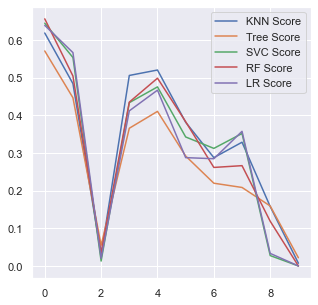

In [35]:
score_types = ['knn_score', 'tree_score', 'svc_score', 'rf_score', 'lr_score']

plt.plot(knn_score, label="KNN Score")
plt.plot(tree_score, label="Tree Score")
plt.plot(svc_score, label="SVC Score")
plt.plot(rf_score, label="RF Score")
plt.plot(lr_score, label="LR Score")

plt.legend()
plt.show()

Below are the scores for each model.

In [36]:
knn_score

[0.6184971098265896,
 0.4841040462427746,
 0.030346820809248554,
 0.5057803468208093,
 0.5202312138728323,
 0.3815028901734104,
 0.2875722543352601,
 0.32850940665701883,
 0.1577424023154848,
 0.00723589001447178]

In [37]:
rf_score

[0.6560693641618497,
 0.5043352601156069,
 0.03468208092485549,
 0.434971098265896,
 0.4985549132947977,
 0.3829479768786127,
 0.2615606936416185,
 0.2662807525325615,
 0.11866859623733719,
 0.0]

In [38]:
lr_score

[0.638728323699422,
 0.5664739884393064,
 0.02023121387283237,
 0.41184971098265893,
 0.4667630057803468,
 0.2875722543352601,
 0.2846820809248555,
 0.35745296671490595,
 0.03328509406657019,
 0.0]

In [39]:
svc_score

[0.6445086705202312,
 0.5534682080924855,
 0.01300578034682081,
 0.43352601156069365,
 0.4754335260115607,
 0.342485549132948,
 0.31213872832369943,
 0.3516642547033285,
 0.027496382054992764,
 0.0]

In [40]:
tree_score

[0.5708092485549133,
 0.44653179190751446,
 0.05491329479768786,
 0.36560693641618497,
 0.41040462427745666,
 0.29190751445086704,
 0.21965317919075145,
 0.20839363241678727,
 0.15918958031837915,
 0.02170767004341534]

## We can see that SVC and RandomForest Classifers with reduced features work the best, peaking around 65% accuracy

## Learning Curve (code from https://vitalflux.com/learning-curves-explained-python-sklearn-example/)

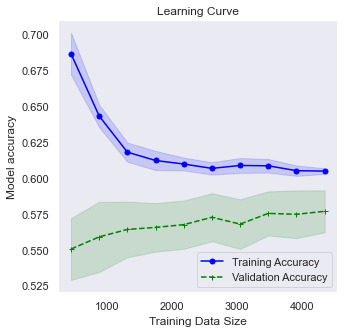

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn import datasets
import matplotlib.pyplot as plt


X = data
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC())])

train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=X_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()


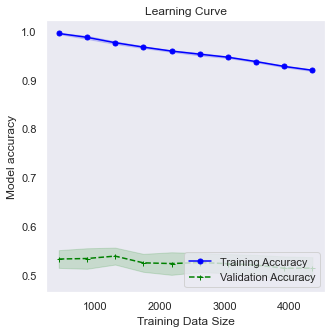

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn import datasets
import matplotlib.pyplot as plt


X = data
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('RF', RF())])

train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=X_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()


The learning curve of the SVM model overall looks better than the learning curve of the random forest model.

## HyperParameter Tuning 
Now, let's tune our hyper parameters for various models we want to look at.

### Base Model for RandomForest
Below is our base model for RandomForest. The results show that we have a train accuracy of 91% and test accuracy of 51%. The testing accuracy is much lower than the training accuracy. Let's try out other models to see if we can improve on this.

Train accuracy: 0.91
Test accuracy: 0.51

Test confusion_matrix


Text(21.5, 0.5, 'True')

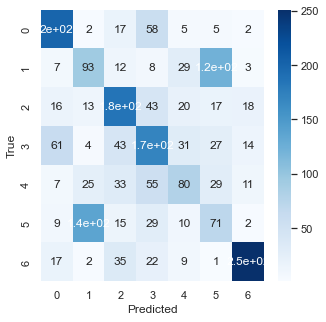

In [43]:
#Base Model for RandomForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    shuffle=True, random_state=0)


dtclf = RandomForestClassifier(random_state = 0)
dtclf.fit(X_train, y_train.values.ravel())
y_pred = dtclf.predict(X_test) # Predictions
y_true = y_test # True values


print("Train accuracy:", np.round(accuracy_score(y_train, 
                                                 dtclf.predict(X_train)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))


cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

### RandomSearch for RandomForest
Using RandomSearch, we see that our training accuracy score is now 55% and the testing accuracy score is 56%. The training score and testing score are closer, but relatively low.

Optimal hyperparameter combination: {'min_samples_split': 5, 'min_samples_leaf': 10, 'max_depth': 10}

Mean cross-validated training accuracy score: 0.5538118769702651
Test accuracy: 0.56
Execution time of Random Search (in Seconds): 7.366000413894653



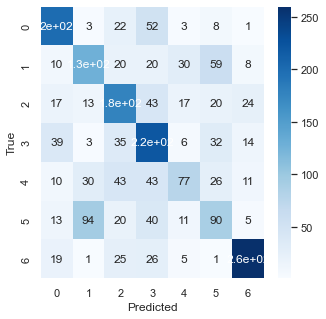

In [44]:
#RandomSearch for RandomForest
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

start = time.time()

# Defining 3-dimensional hyperparameter space as a Python dictionary
hyperparameter_space = {'max_depth':[2,3,4,6,8,10,12,15,20], 
                        'min_samples_leaf':[1,2,4,6,8,10,20,30],
                        'min_samples_split':[2,3,4,5,6,8,10]}


rs = RandomizedSearchCV(dtclf, param_distributions=hyperparameter_space,
                        n_iter=10, scoring="accuracy", random_state=0,
                        n_jobs=-1, cv=10, return_train_score=True)

rs.fit(X_train, y_train.values.ravel())
print("Optimal hyperparameter combination:", rs.best_params_)
print()
print("Mean cross-validated training accuracy score:",
      rs.best_score_)
rs.best_estimator_.fit(X_train, y_train.values.ravel())
y_pred = rs.best_estimator_.predict(X_test) # Predictions
y_true = y_test # True values

print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))
cf_matrix = confusion_matrix(y_true, y_pred)

sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print()

### GridSearching key hyperparameters for RandomForestClassifier
By using Grid Serach Cross Validation to tune our hyperparameters, we see that we get the best result of 51% accuracy using sqrt as max features and 1000 estimators.

In [45]:
#grid searching key hyperparameters for RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train.values.ravel())

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.513252 using {'max_features': 'log2', 'n_estimators': 1000}
0.483507 (0.022303) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.510636 (0.023560) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.513045 (0.021069) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.483576 (0.023501) with: {'max_features': 'log2', 'n_estimators': 10}
0.510431 (0.021807) with: {'max_features': 'log2', 'n_estimators': 100}
0.513252 (0.023749) with: {'max_features': 'log2', 'n_estimators': 1000}


### RandomSearch for RandomForest

Optimal hyperparameter combination: {'kernel': 'rbf', 'C': 10}

Mean cross-validated training accuracy score: 0.5742672744312857
Test accuracy: 0.57
Execution time of Random Search (in Seconds): 9.33136773109436



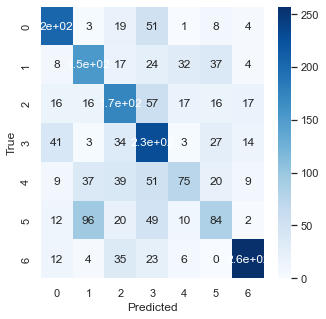

In [46]:
#RandomSearch for RandomForest
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import RandomizedSearchCV

start = time.time()

# Defining 3-dimensional hyperparameter space as a Python dictionary
hyperparameter_space = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
svc.fit(X_train, y_train.values.ravel())

rs = RandomizedSearchCV(svc, param_distributions=hyperparameter_space,
                        n_iter=10, scoring="accuracy", random_state=0,
                        n_jobs=-1, cv=10, return_train_score=True)

rs.fit(X_train, y_train.values.ravel())
print("Optimal hyperparameter combination:", rs.best_params_)
print()
print("Mean cross-validated training accuracy score:",
      rs.best_score_)
rs.best_estimator_.fit(X_train, y_train.values.ravel())
y_pred = rs.best_estimator_.predict(X_test) # Predictions
y_true = y_test # True values

print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))
cf_matrix = confusion_matrix(y_true, y_pred)

sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print()

### GridSearching key hyperparametres for SVC v1 
Below using SVC v1, we see that the optimal hyperparameter combination is C=10, a radial basis function kernel. This got us a training accuracy score of 57% and test accuracy score of 57%.

In [47]:
#grid searching key hyperparametres for SVC v1 
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train.values.ravel())
GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
sorted(clf.cv_results_.keys())

print("Optimal hyperparameter combination:", clf.best_params_)
print()
print("Mean cross-validated training accuracy score:",
      clf.best_score_)
clf.best_estimator_.fit(X_train, y_train.values.ravel())
y_pred = clf.best_estimator_.predict(X_test) # Predictions
y_true = y_test # True values

print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))
cf_matrix = confusion_matrix(y_true, y_pred)



Optimal hyperparameter combination: {'C': 10, 'kernel': 'rbf'}

Mean cross-validated training accuracy score: 0.5721974174619826
Test accuracy: 0.57


### GridSearching key hyperparametres for SVC v2
Below using SVC v2, we compare different kernels (rbf, poly, and sigmoid) with various C values (50, 10, 1, and 0.01). We see that the optimal hyperparameter combination is C=10, and a radial basis function kernel. This provided us with an accuracy of 57%.

In [48]:
#grid searching key hyperparametres for SVC v2
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train.values.ravel())

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.572055 using {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.560420 (0.021887) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.568130 (0.022402) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.191970 (0.032797) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.563035 (0.022234) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.572055 (0.022937) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.150726 (0.010872) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.565651 (0.020729) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.569024 (0.021268) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.138262 (0.008937) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.560694 (0.020589) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.555459 (0.022200) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.167527 (0.000515) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.556080 (0.020365) with: {'C': 0.01, 'gamma': 'scale', 

### GridSearching key hyperparametres for logistic regression
Below we tune our hyperparameters for logistic regression using various values of C (100, 10, 1, and 0.01), l2 penalty, and various solvers (newton-cg, lbfgs, and liblinear). We achieved the best results using C=1.0, with a newton-cg solver.

In [49]:
#grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


# define models and parameters
model = LogisticRegression(max_iter=1000)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train.values.ravel())

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.548782 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.545959 (0.018379) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.545821 (0.018490) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.546786 (0.018287) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.548162 (0.019451) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.548230 (0.019510) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.546373 (0.017809) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.548782 (0.018881) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.548782 (0.018881) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.539829 (0.016945) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.530259 (0.019703) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.530259 (0.019703) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.512976 (0.021137) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.458099 (0.018207) wit

### GridSearching key hyperparametres for KNeighborsClassifier
Below we tune the hyperparameters for K Nearest Neighbors with 3 different metrics (euclidean, manhattan, and minkowski), various numbers of neighbors (1, 3, 5, 7, 9, 11, 13, 15, 17, 19), and either uniform of distance weights. We got the greatest accuracy of 51% by using a euclidean metric with 19 neighbors, and uniform weights.

In [50]:
#grid searching key hyperparametres for KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train.values.ravel())

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.551191 using {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}
0.416994 (0.020764) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.416994 (0.020764) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.474348 (0.016945) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.447149 (0.021148) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.510084 (0.020528) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.475654 (0.022296) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.524063 (0.024057) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.490252 (0.024691) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.532258 (0.021931) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.493145 (0.022128) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.534116 

### GridSearching key hyperparameters for BaggingClassifier
Below we tune our hyperparameters for BaggingClassifier with different numbers of estimators. We found the greatest accuracy of 50% with 1000 estimators.

In [51]:
#grid searching key hyperparameters for BaggingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

# define models and parameters
model = BaggingClassifier()
n_estimators = [10, 100, 1000]

# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train.values.ravel())

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.503751 using {'n_estimators': 1000}
0.482129 (0.022586) with: {'n_estimators': 10}
0.501340 (0.023061) with: {'n_estimators': 100}
0.503751 (0.021834) with: {'n_estimators': 1000}


# Interperting Results

As we can see, out of all the models, SVM performed the best after both GridSearch and RandomSearch hyperparameter optimization as it scored around 0.57, which is the highest out of all the other models and the results perfectly aligns with our predictions in learning curve. While RandomForest, Linear Regression, and KNN optimized only scored around 0.55. The hyperparameter combination that yielded the highest score for SVM was using {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}. 

The training accuracy is good, but our testing accuracy is poor. This indicates that we may have an overfitted model that does not generalize well to the rest of the data. Another possibility is that the plasticity of each music genre is high, which may have made it difficult to classify songs with great accuracy based on the given metrics we chose to analyze.

Below are ways that we could possibly improve on this problem.

1. We need to change and improve the hyper parameters of the model.
2. We need to dive deeper into other machine learning algorithms.
3. We need more data.
4. There may be no relationship between genre and song characteristics.

What we can gather from tackling this problem is that music genre is much more complex than we initially thought, and characteristic level may not be the best measure for predicting genre. Some other things to consider with genre may be the physical ones of the sound waves of the song.

# Limitations

As we stated earlier, our variables are made-up metrics given to us by Spotify through their research. However, this means that there could be a limitation in our data that prevented us from achieving better accuracy. We do not know if these metrics have any real scientific value to them. If these metrics were given to us by a music expert or doctor(if it even exists) that has spent some time researching and understanding each genre of music, we may be able to be more confident with our data. Similarly, there may be other metrics that we do not know of that are not in this dataset that could help us classify genres better. Overall, this could also be a result of us not fully understanding music genres, limiting our results to only what is achievable through simple a machine learning process. 

# Ethics & Privacy

There are very few Ethics and Privacy concerns with this project. The Spotify account, “The Sounds of Spotify” is where the dataset comes from. It is a verified public account by Spotify that showcases music from every genre, year, etc. The biggest concern is with Spotify’s audio features. We do not know how they came up with these features and their values. We also do not know if they are accurate. However, given the fact that all of the songs on the dataset are from Spotify, we can assume that the features of the songs are measured in the same manner. Therefore, we can say that by using these features we will be able to predict the genre of the song. 


# Team Expectations 


* *Be proactive about deadlines*
* *Make sure you do your job that is assigned*
* *communicate any trouble and ask for help if you need to*
* *Follow deadlines, if there is a deadline work should be done before deadline*
* *Try to be able to make time for meetings*
* *Since we use discord, check discord messages often*
* *Any conflict should be discussed among ourselves first*
* *We will do majority vote when we have to make decisions*
* *Each person should have equal amount of work*


# Project Timeline Proposal



| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 4/16  |  2 PM |  Brainstorm topics/questions (all)  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 4/20  |  2 PM |  Do background research on topic (Mary) | Discuss ideal dataset(s) and ethics; draft project proposal (everyone)| 
| 4/22  | 2 PM  | Edit, finalize, and submit proposal; Search for datasets (Jota)  | Discuss Wrangling and possible analytical approaches (Wei); Assign group members to lead each specific part (Josie)  |
| 4/29  | 2 PM  | Import & Wrangle Data ,do some EDA (David), finish building model and training it | Review/Edit wrangling/EDA; Discuss Evaluation Plan   |
| 5/13  | 2 PM | Finalized EDA (David), Model training and scoring (Jota), Feature selection (Josie), Visualizations and Data Cleaning (Mary)  | Discuss/edit checkpoint, finish preliminary results |
| 5/20  | 2 PM  | Review and finalize checkpoint with updated timeline (Wei)| Turn in Checkpoint |
| 5/27  | 2 PM  | Begin drafting results and formulating deep analysis (All) | Discuss which model to use based on prelim results |
| 6/3  | 2 PM  | Complete analysis; Draft results/conclusion/discussion (All)| Discuss/edit full project |
| 6/8  | Before 11:59 PM  | NA | Turn in Final Project  |

# Footnotes
<a name="footnote1"></a>1.[^](#1):Spotify User Stats (Updated Oct 2021).” Backlinko, 14 Oct. 2021, https://backlinko.com/spotify-users. <br>

<a name="2"></a>2.[^](#2)“Shifting Consumption towards Diverse Content via Reinforcement Learning.” Spotify Research, 30 Sept. 2021, https://research.atspotify.com/shifting-consumption-towards-diverse-content-via-reinforcement-learning/. <br>

<a name="sotanote"></a>3.[^](#3): Venturott, Pedro Henrique Gomes. “Predicting Music Genres Using Waveform Features.” Medium, Towards Data Science, 3 Mar. 2021, https://towardsdatascience.com/predicting-music-genres-using-waveform-features-5080e788eb64. <br>

<a name="footnote1"></a>4.[^](#4):Plantinga, Bo. “What Do Spotify's Audio Features Tell Us about This Year's Eurovision Song Contest? 🤔.” Medium, Medium, 29 Apr. 2018, https://medium.com/@boplantinga/what-do-spotifys-audio-features-tell-us-about-this-year-s-eurovision-song-contest-66ad188e112a.  <br>

<a name="footnote1"></a>5.[^](#5):Venturott, Pedro Henrique Gomes. “Predicting Music Genres Using Waveform Features.” Medium, Towards Data Science, 3 Mar. 2021, https://towardsdatascience.com/predicting-music-genres-using-waveform-features-5080e788eb64. <br>